<a href="https://colab.research.google.com/github/Nhan-beo123/CNN-hw/blob/main/btcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt

data_dir = "/content/drive/MyDrive/data (2)"
img_size = (160, 160)
batch_size = 16
seed = 42

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Cảm xúc:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

base_model = MobileNetV2(input_shape=img_size + (3,),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False

model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')  # Phân loại cảm xúc
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

model.save("emotion_mobilenet_model.h5")


Found 42 files belonging to 3 classes.
Using 34 files for training.
Found 42 files belonging to 3 classes.
Using 8 files for validation.
Cảm xúc: ['bất ngờ', 'bình thường', 'vui']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.2574 - loss: 1.4687 - val_accuracy: 0.2500 - val_loss: 1.1182
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 372ms/step - accuracy: 0.3934 - loss: 1.2222 - val_accuracy: 0.2500 - val_loss: 1.0906
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 666ms/step - accuracy: 0.3171 - loss: 1.4040 - val_accuracy: 0.2500 - val_loss: 1.0727
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 380ms/step - accuracy: 0.3483 - loss: 1.2939 - val_accuracy: 0.2500 - val_loss: 1.0868
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 372ms/step - accuracy: 0.3336 - loss: 1.3652 - val_accuracy: 0.2500 - val_loss: 1.1117
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 352ms/step - accuracy: 0.5000 - loss: 1.0343 - val_accuracy: 0.2500 - val_loss: 1.1877
Epoch 7/1

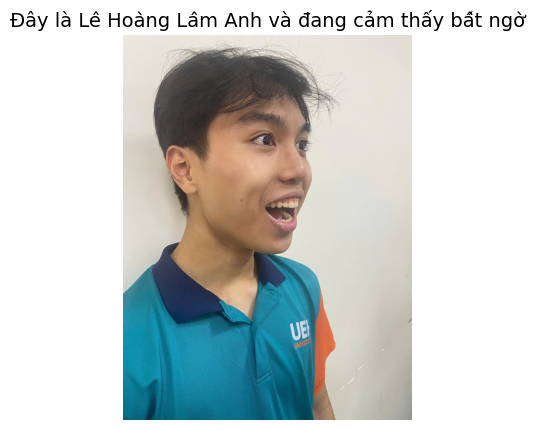

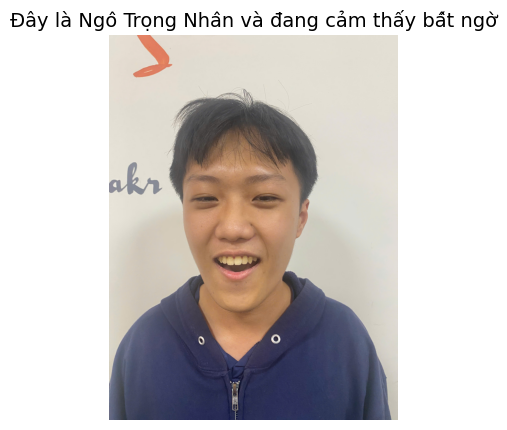

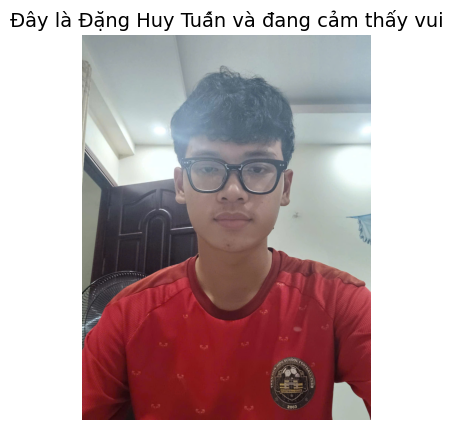

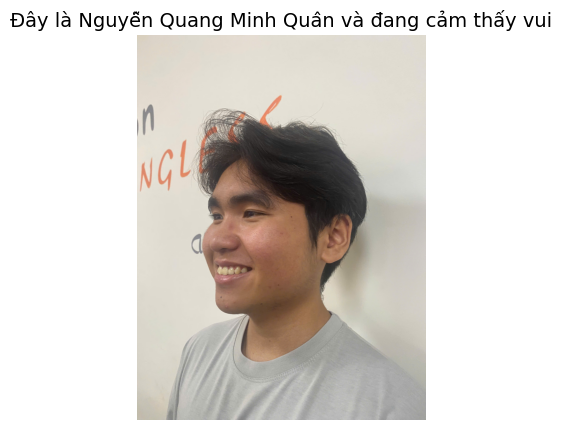

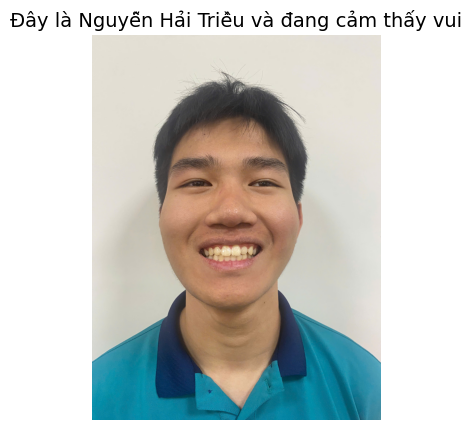

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Danh sách đường dẫn ảnh
img_paths = [
    "/content/drive/MyDrive/data (2)/bất ngờ/Lê Hoàng Lâm Anh/batngo_2.jpg",
    "/content/drive/MyDrive/data (2)/bất ngờ/Ngô Trọng Nhân/batngo_2.jpg",
    "/content/drive/MyDrive/data (2)/bình thường/Đặng Huy Tuấn/binhthuong_2.jpg",
    '/content/drive/MyDrive/data (2)/vui/Nguyễn Quang Minh Quân/vui_3.jpg',
    '/content/drive/MyDrive/data (2)/vui/Nguyễn Hải Triều/vui_2.jpg'
]

for img_path in img_paths:
    # Load ảnh resize để predict
    img_for_model = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img_for_model)
    img_array_expanded = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array_expanded, verbose=0)
    predicted_class = class_names[np.argmax(predictions)]

    # Load lại ảnh gốc (không resize) để hiển thị
    img_display = image.load_img(img_path)


    folder_path = os.path.dirname(img_path)
    person_name = os.path.basename(folder_path)

    plt.figure(figsize=(5, 5))
    plt.imshow(img_display)
    plt.title(f"Đây là {person_name} và đang cảm thấy {predicted_class}", fontsize=14)
    plt.axis("off")
    plt.show()
